In [3]:
# Importing modules
import pandas as pd
import os

# import os)# Read data into papers
# os.chdir('.')
papers = pd.read_csv('old_tweet.csv')
# Print head
papers.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,Feeling
0,0,wchacon,2022-07-05 19:58:34+00:00,0,dlvr.it,"Asia's Largest, Prized Hackathon Organised by ...",Positive
1,1,CaritauInfo,2022-07-05 19:05:01+00:00,0,WordPress.com,Hackathon Terbesar dan Berharga di Asia Disele...,Neutral
2,2,InvestorIdeas,2022-07-05 16:10:02+00:00,0,dlvr.it,"Asia's Largest, Prized Hackathon Organised by ...",Positive
3,3,delete75522330,2022-07-05 15:05:32+00:00,0,Twitter Web App,"Asia's Largest, Prized Hackathon Organised by ...",Positive
4,4,xiaojiuwo8,2022-07-05 14:07:29+00:00,0,Twitter Web App,"Asia's Largest, Prized Hackathon Organised by ...",Positive


In [4]:
cleantweets = papers.drop(columns=['Date Created', 'Source of Tweet', 'Feeling', 'Number of Likes', 'Unnamed: 0'], axis=1)
cleantweets.head()

,User,Tweet
0,wchacon,"Asia's Largest, Prized Hackathon Organised by ..."
1,CaritauInfo,Hackathon Terbesar dan Berharga di Asia Disele...
2,InvestorIdeas,"Asia's Largest, Prized Hackathon Organised by ..."
3,delete75522330,"Asia's Largest, Prized Hackathon Organised by ..."
4,xiaojiuwo8,"Asia's Largest, Prized Hackathon Organised by ..."


In [5]:
# Load the regular expression library
import re# Remove punctuation
cleantweets['paper_text_processed'] = \
cleantweets['Tweet'].map(lambda x: re.sub('[^a-zA-Z,\.!?]', '', x))# Convert the titles to lowercase
cleantweets['paper_text_processed'] = \
cleantweets['Tweet'].map(lambda x: re.sub('https\S+', '', x))# remove urls

# Convert & to and
# cleantweets['paper_text_processed'] = \
# cleantweets['Tweet'].map(lambda x: re.sub('&\S+', 'and', x))

cleantweets['paper_text_processed'] = \
cleantweets['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
cleantweets['paper_text_processed'].head()

0    asia's largest, prized hackathon organised by ...
1    hackathon terbesar dan berharga di asia disele...
2    asia's largest, prized hackathon organised by ...
3    asia's largest, prized hackathon organised by ...
4    asia's largest, prized hackathon organised by ...
Name: paper_text_processed, dtype: object

In [12]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darientan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
all_filtered_sentence = []
for d in cleantweets['paper_text_processed']:
    word_list= d.strip().split(" ")
    #print('w',word_list)
    
    # Lemmatize list of words
    lemmatized_output = [lemmatizer.lemmatize(w) for w in word_list]
    #print(lemmatized_output)
    
    stops = set(stopwords.words("english"))  
    
    filtered_sentence = ' '.join([w for w in lemmatized_output if not w.lower() in stops])
    all_filtered_sentence.append(filtered_sentence)
 
    #print(filtered_sentence)

cleantweets['paper_text_processed_filtered'] = all_filtered_sentence

In [49]:
cleantweets

,User,Tweet,paper_text_processed,paper_text_processed_filtered
0,wchacon,"Asia's Largest, Prized Hackathon Organised by ...","asia's largest, prized hackathon organised by ...","asia's largest, prized hackathon organised mor..."
1,CaritauInfo,Hackathon Terbesar dan Berharga di Asia Disele...,hackathon terbesar dan berharga di asia disele...,hackathon terbesar dan berharga di asia disele...
2,InvestorIdeas,"Asia's Largest, Prized Hackathon Organised by ...","asia's largest, prized hackathon organised by ...","asia's largest, prized hackathon organised mor..."
3,delete75522330,"Asia's Largest, Prized Hackathon Organised by ...","asia's largest, prized hackathon organised by ...","asia's largest, prized hackathon organised mor..."
4,xiaojiuwo8,"Asia's Largest, Prized Hackathon Organised by ...","asia's largest, prized hackathon organised by ...","asia's largest, prized hackathon organised mor..."
...,...,...,...,...
496,ians_india,#Indian public broadcaster #PrasarBharati has ...,#indian public broadcaster #prasarbharati has ...,#indian public broadcaster #prasarbharati ha s...
497,smkamatchi,#TNWelcomesModi my heartiest welcome hon ble p...,#tnwelcomesmodi my heartiest welcome hon ble p...,#tnwelcomesmodi heartiest welcome hon ble pm n...
498,hackJunction,Ever wonder what goes on in a #hackathon? Have...,ever wonder what goes on in a #hackathon? have...,ever wonder go #hackathon? read last weekend o...
499,IndiaNews777,PM Modi hails students for their efforts at Si...,pm modi hails students for their efforts at si...,pm modi hail student effort singapore-india ha...


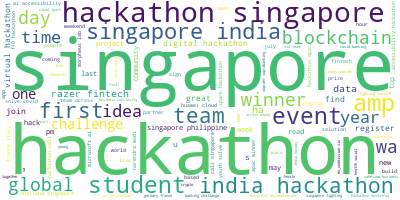

In [50]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(cleantweets['paper_text_processed_filtered'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [36]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words]for doc in texts]
data = cleantweets.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['asia', 'largest', 'prized', 'hackathon', 'organised', 'morpheus', 'labs', 'blockchain', 'association', 'singapore', 'bas', 'benzinga']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darientan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [38]:
from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"singapore" + 0.050*"hackathon" + 0.009*"join" + 0.009*"blockchain" + '
  '0.008*"time" + 0.008*"first" + 0.006*"fintech" + 0.006*"regtech" + '
  '0.006*"podcast" + 0.005*"ecommerce"'),
 (1,
  '0.046*"hackathon" + 0.044*"singapore" + 0.008*"india" + 0.007*"amp" + '
  '0.007*"innovation" + 0.006*"teams" + 0.006*"modi" + 0.006*"pm" + '
  '0.005*"team" + 0.005*"narendra"'),
 (2,
  '0.060*"hackathon" + 0.056*"singapore" + 0.013*"india" + 0.007*"fintech" + '
  '0.007*"first" + 0.006*"covid" + 0.006*"amp" + 0.006*"razer" + '
  '0.005*"challenges" + 0.005*"solve"'),
 (3,
  '0.053*"singapore" + 0.049*"hackathon" + 0.013*"india" + 0.010*"th" + '
  '0.009*"students" + 0.006*"event" + 0.006*"team" + 0.005*"amp" + '
  '0.005*"days" + 0.004*"held"'),
 (4,
  '0.030*"hackathon" + 0.026*"singapore" + 0.005*"women" + 0.004*"much" + '
  '0.004*"march" + 0.003*"privacy" + 0.003*"super" + 0.003*"hrs" + '
  '0.003*"xilinx" + 0.003*"aws"'),
 (5,
  '0.028*"singapore" + 0.027*"hackathon" + 0.010

In [39]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))# # this is a bit time consuming - make the if statement True

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.039736  0.095332       1        1  16.635323
9     -0.132086 -0.012794       2        1  14.523625
2     -0.027888  0.030074       3        1  13.904325
3     -0.053466 -0.074210       4        1  13.017668
1      0.006334  0.064338       5        1  11.350859
0     -0.024423 -0.056769       6        1  10.459258
8      0.070303  0.056728       7        1   9.580363
5      0.063387 -0.032543       8        1   4.698557
4      0.076393 -0.030097       9        1   3.495691
7      0.061183 -0.040059      10        1   2.334331, topic_info=            Term       Freq      Total Category  logprob  loglift
4     blockchain  35.000000  35.000000  Default  30.0000  30.0000
36          apac  19.000000  19.000000  Default  29.0000  29.0000
1215        june   7.000000   7.000000  Default  28.0000  28.0000
586        india  62.000000  62.000000  Default  27.0000  27.0000
231      winners  35.000000  35.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
586        india   0.659719  62.389177  Topic10  -5.8069  -0.7919
709           pm   0.578817  29.140803  Topic10  -5.9377  -0.1615
797         held   0.526931  12.904593  Topic10  -6.0316   0.5592
409           sa   0.526919   4.791847  Topic10  -6.0316   1.5498
347         made   0.526893   2.706544  Topic10  -6.0317   2.1210

[684 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1791      7  0.820660        abhayjere
58        4  0.877854               ac
2049      1  0.653342  academybyjaysel
319       2  0.840930       accelerate
1770      3  0.891151      accelerator
...     ...       ...              ...
353       6  0.041441            youth
353       7  0.041441            youth
889       2  0.857918     yuvabharathi
1346      5  0.680038           zifeng
1813      8  0.730667            รวมกบ

[1344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 3, 4, 2, 1, 9, 6, 5, 8])

In [40]:
cleantweets.to_csv('topic_filtered.csv')